# Data science I

## pandas

![](https://pandas.pydata.org/_static/pandas_logo.png)

> pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language ([pandas-website](https://pandas.pydata.org/index.html)).

Let's say we want to investigate the weather data recorded at the Frankfurt International Airport from the year 2015. The data is available in the tabular CSV format:

![](images/S01E04/csv_example.png) 

### Read data

First, we want to read the data:

In [3]:
import pandas as pd
tabelle = pd.read_csv("../data/frankfurt_weather.csv", parse_dates=["time"], index_col="time", sep=",", na_values="")

The pandas function `pd.read_csv(...)` opens the csv file and reads its contents. 

- The `parse_dates` argument tells Python to interpret the values in the `time` column as dates 
- The `index_col` argument tells it to use this column as index.
- The `sep` argument tells it which character it should use for separating columns
- The `na_values` argument tells pandas, which values should be interpreted as NaN (missing) values. In our case, missing values are just blank cells (`""`)

pandas has many more readers for a variety of file types, e.g. Excel, SQL, HDF, HTML, etc. The full list of supported file types and the respective readers can be found [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).

In [2]:
# HIDECELL
pd.set_option('display.max_rows', 5)

### DataFrame

All data is stored in the `tabelle` object. This object is a so-called **DataFrame**, the basic pandas object. You can think of it like a spreadsheet.

To be more precise, it is a two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns).

The DataFrame object offers many functions that allow you to work with the data conveniently.

For a first glimps at the data, you can call the `head()` function which prints out the first 5 rows of the table:

In [43]:
tabelle.head()

,visibility,air_temperature,dewpoint,wind_direction,wind_speed,air_pressure,cloud_height,cloud_cover
time,,,,,,,,
2015-01-01 00:20:00,2800,1.0,1.0,0.0,0.0,1036.0,200.0,OVC
2015-01-01 00:50:00,1500,1.0,1.0,0.0,0.0,1036.0,100.0,OVC
2015-01-01 01:20:00,1000,1.0,1.0,0.0,0.0,1036.0,100.0,OVC
2015-01-01 01:50:00,700,1.0,1.0,0.0,0.0,1036.0,NaN,NaN
2015-01-01 02:20:00,600,1.0,1.0,0.0,0.0,1036.0,NaN,NaN


To get an **overview** of the value distributions of the variables within `tabelle`, you can call the `describe()` function. It generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values:

In [44]:
tabelle.describe()

,visibility,air_temperature,dewpoint,wind_direction,wind_speed,air_pressure,cloud_height
count,17520.000000,17507.000000,17507.00000,15615.000000,17519.000000,17507.000000,10210.000000
mean,9421.269977,11.679785,6.00674,169.353186,7.120212,1018.367967,2142.938296
...,...,...,...,...,...,...,...
75%,10000.000000,17.000000,10.00000,230.000000,10.000000,1024.000000,3100.000000
max,10000.000000,39.000000,20.00000,360.000000,40.000000,1041.000000,8000.000000


The `dtypes` field of `tabelle` shows you all column names and the **data type** of the respective column:

In [45]:
tabelle.dtypes

visibility           int64
air_temperature    float64
                    ...   
cloud_height       float64
cloud_cover         object
Length: 8, dtype: object

If you want to know, how many columns and lines the table consists of, use the `shape` attribute:

In [11]:
tabelle.shape

(17520, 8)

Let's say, you want to **sort** this table by visibility values in descending order. 

You can sort a pandas DataFrame by the values of a specific column, using the `sort_values()` function:

In [46]:
tabelle.sort_values(by="visibility", ascending=False).head()

,visibility,air_temperature,dewpoint,wind_direction,wind_speed,air_pressure,cloud_height,cloud_cover
time,,,,,,,,
2015-07-02 12:20:00,10000,34.0,15.0,90.0,6.0,1019.0,NaN,NaN
2015-08-13 23:20:00,10000,24.0,17.0,240.0,21.0,1010.0,NaN,NaN
2015-08-13 16:50:00,10000,34.0,15.0,20.0,14.0,1009.0,NaN,NaN
2015-08-13 17:20:00,10000,34.0,16.0,10.0,12.0,1009.0,NaN,NaN
2015-08-13 17:50:00,10000,33.0,16.0,30.0,11.0,1009.0,NaN,NaN


### Selection by label

Let's assume, we are not interested in the complete year 2015 but only in August. We can select the respective rows with the `loc` attribute.

When the index of the DataFrame is a range of dates (like in this case), you can **select** a row ( = measurement date) by specifying a date (as string):

In [47]:
tabelle.loc["2015-08"].head() # select all measurements of August 2015.

,visibility,air_temperature,dewpoint,wind_direction,wind_speed,air_pressure,cloud_height,cloud_cover
time,,,,,,,,
2015-08-01 00:20:00,10000,16.0,5.0,30.0,11.0,1015.0,NaN,NaN
2015-08-01 00:50:00,10000,16.0,5.0,20.0,11.0,1014.0,NaN,NaN
2015-08-01 01:20:00,10000,16.0,5.0,20.0,10.0,1014.0,NaN,NaN
2015-08-01 01:50:00,10000,16.0,5.0,30.0,10.0,1014.0,NaN,NaN
2015-08-01 02:20:00,10000,16.0,5.0,20.0,10.0,1014.0,NaN,NaN


If you want to select a specific date range, you can do so by providing a start and end date (notice that the specific dates do not have to match the date values in the "time" column):

In [48]:
tabelle.loc["2015-08-01 15:55":"2015-08-01 19:20"] # selects all rows between 2015-08-01 15:55 and 2015-08-01 19:20

,visibility,air_temperature,dewpoint,wind_direction,wind_speed,air_pressure,cloud_height,cloud_cover
time,,,,,,,,
2015-08-01 16:20:00,10000,27.0,6.0,190.0,9.0,1013.0,NaN,NaN
2015-08-01 16:50:00,10000,27.0,7.0,180.0,9.0,1013.0,NaN,NaN
...,...,...,...,...,...,...,...,...
2015-08-01 18:50:00,10000,22.0,10.0,210.0,4.0,1014.0,NaN,NaN
2015-08-01 19:20:00,10000,21.0,10.0,190.0,5.0,1015.0,NaN,NaN


What if we are only interested in the measurements between 12:00 and 15:00 for each day?
Unfortunately, for this task we cannot use the `loc` attribute. However, the `between_time()` function helps us:

In [49]:
tabelle.between_time("12:00", "15:00")

,visibility,air_temperature,dewpoint,wind_direction,wind_speed,air_pressure,cloud_height,cloud_cover
time,,,,,,,,
2015-01-01 12:20:00,1600,3.0,2.0,220.0,3.0,1036.0,300.0,FEW
2015-01-01 12:50:00,2000,3.0,2.0,NaN,2.0,1036.0,500.0,BKN
...,...,...,...,...,...,...,...,...
2015-12-31 14:20:00,3800,5.0,4.0,NaN,1.0,1024.0,400.0,BKN
2015-12-31 14:50:00,3500,5.0,4.0,NaN,2.0,1024.0,300.0,BKN


Now we know, how to select rows in time series (=measurements). But what if we are only interested in one specific variable, e.g. cloud height? 

You can **select** single **columns** by:

In [9]:
tabelle.loc[:, "cloud_height"]

time
2015-01-01 00:20:00    200.0
2015-01-01 00:50:00    100.0
                       ...  
2015-12-31 23:20:00      NaN
2015-12-31 23:50:00    100.0
Name: cloud_height, Length: 17520, dtype: float64

Note that selecting a single column returns a [**Series**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) object and not just the column as a list for example. In principle, a Series is a one-dimensional DataFrame and it provides more or less the same functionality.

For example, you can use the `count()` method to count the values within a column/Series:

In [13]:
tabelle.loc[:, "cloud_height"].count()

10210

As you can see, the returned value of `10210` is smaller than the total table row count of `17520` because NaN values are excluded automatically.

There are many more methods provided with the Series class but we will not go into further detail here.

If you are interested to get a simple list of the values of the column use the `.to_list()` method but most of the time it is better to use the `.values` attribute which returns the values as an array (don't worry about what an array is right now. We will cover that in the next chapter):

In [10]:
tabelle.loc[:, "cloud_height"].values

array([200., 100., 100., ...,  nan,  nan, 100.])

You can **select** multiple **columns** by:

In [51]:
tabelle.loc[:, ["visibility", "air_temperature"]]

,visibility,air_temperature
time,,
2015-01-01 00:20:00,2800,1.0
2015-01-01 00:50:00,1500,1.0
...,...,...
2015-12-31 23:20:00,500,5.0
2015-12-31 23:50:00,500,5.0


You can also **select columns and rows** together within one call:

In [52]:
tabelle.loc["2015-11-01 15:55":"2015-11-01 19:20", ["visibility", "air_temperature"]]

,visibility,air_temperature
time,,
2015-11-01 16:20:00,250,5.0
2015-11-01 16:50:00,200,6.0
...,...,...
2015-11-01 18:50:00,100,6.0
2015-11-01 19:20:00,100,5.0


### Selection by position (index)

Just as with the label selection, you can select values via their index using `iloc`:

In [53]:
tabelle.iloc[3:5, 0:2]

,visibility,air_temperature
time,,
2015-01-01 01:50:00,700,1.0
2015-01-01 02:20:00,600,1.0


**Task**

1. Download the following file to your local machine

https://github.com/python-kurs/sommersemester_2019/blob/master/content/data/frankfurt_weather.csv

2. Import pandas, open the file and set the time column as index

3. Clip the table to February 01, 2015 and the variables "visibility", "air_temperature", and "wind_speed".

**Solution**

2. ```python
import pandas as pd
tabelle = pd.read_csv("path/to/frankfurt_weather.csv", parse_dates=["time"], index_col="time", sep=",")
```

3. ```python
tabelle.loc["2015-02-01", ["visibility", "air_temperature", "wind_speed"]]
```

### Boolean indexing

What if you don't want to clip the table to specific times but to other conditions? Let's assume you want to select all rows, where visibility was measured to be below 1000m.

You can do this easily by specifying the conditions within the `[` `]` brackets:

In [54]:
tabelle[tabelle.visibility < 1000] # Selects all rows where visibility < 1000

,visibility,air_temperature,dewpoint,wind_direction,wind_speed,air_pressure,cloud_height,cloud_cover
time,,,,,,,,
2015-01-01 01:50:00,700,1.0,1.0,0.0,0.0,1036.0,NaN,NaN
2015-01-01 02:20:00,600,1.0,1.0,0.0,0.0,1036.0,NaN,NaN
...,...,...,...,...,...,...,...,...
2015-12-31 23:20:00,500,5.0,5.0,NaN,2.0,1026.0,NaN,NaN
2015-12-31 23:50:00,500,5.0,5.0,240.0,3.0,1026.0,100.0,BKN


You can also use multiple columns to select data after specific criteria. Let's say we are only interested in rows with visibility values below 1000m and temperature values above 5 °C:

In [55]:
tabelle[(tabelle.visibility < 1000) & (tabelle.air_temperature>5)] # selects all rows where vis < 1000 and temp > 5

,visibility,air_temperature,dewpoint,wind_direction,wind_speed,air_pressure,cloud_height,cloud_cover
time,,,,,,,,
2015-08-29 02:20:00,500,15.0,15.0,60.0,4.0,1022.0,100.0,BKN
2015-10-05 01:50:00,400,9.0,9.0,10.0,4.0,1016.0,100.0,SCT
...,...,...,...,...,...,...,...,...
2015-12-24 05:20:00,300,6.0,6.0,NaN,1.0,1026.0,100.0,FEW
2015-12-24 06:20:00,700,6.0,6.0,NaN,1.0,1025.0,600.0,SCT


### Operations

Besides its many selection options, the DataFrame class provides many functions for calculating statistical measures, e.g. the average of each column:

In [58]:
tabelle.mean()

visibility         9421.269977
air_temperature      11.679785
                      ...     
air_pressure       1018.367967
cloud_height       2142.938296
Length: 7, dtype: float64

You can do the same for single columns (`Series`):

In [59]:
tabelle.visibility.mean()

9421.26997716895

And of course, you can combine all of the above:

In [60]:
tabelle[tabelle.visibility < 1000].wind_speed.median() # Calculate the median wind speed for times when the visibility was below 1000m

3.0

If you want to apply specific operations to your data that are not covered by the standard functions of pandas, you can do so by using the `apply()` method. This works for single Series or along an axis of a DataFrame object:

In [5]:
print(tabelle.air_temperature)

# First we define the function
def do_sth(x):
    return (x + 5) ** 2

# then we apply it to the temperature Series:
tabelle.air_temperature.apply(do_sth)

time
2015-01-01 00:20:00    1.0
2015-01-01 00:50:00    1.0
                      ... 
2015-12-31 23:20:00    5.0
2015-12-31 23:50:00    5.0
Name: air_temperature, Length: 17520, dtype: float64


time
2015-01-01 00:20:00     36.0
2015-01-01 00:50:00     36.0
                       ...  
2015-12-31 23:20:00    100.0
2015-12-31 23:50:00    100.0
Name: air_temperature, Length: 17520, dtype: float64

But what if we want to do an operation on multiple columns at the same time and save the result in a new column? 

Let's say we want to calculate the difference between air temperature and dewpoint values and save the results to a new column named "temp_dewpt_diff".

We can achieve this easily via:

In [62]:
tabelle["temp_dewpt_diff"] = tabelle.air_temperature - tabelle.dewpoint
tabelle.head()

,visibility,air_temperature,dewpoint,wind_direction,wind_speed,air_pressure,cloud_height,cloud_cover,temp_dewpt_diff
time,,,,,,,,,
2015-01-01 00:20:00,2800,1.0,1.0,0.0,0.0,1036.0,200.0,OVC,0.0
2015-01-01 00:50:00,1500,1.0,1.0,0.0,0.0,1036.0,100.0,OVC,0.0
2015-01-01 01:20:00,1000,1.0,1.0,0.0,0.0,1036.0,100.0,OVC,0.0
2015-01-01 01:50:00,700,1.0,1.0,0.0,0.0,1036.0,NaN,NaN,0.0
2015-01-01 02:20:00,600,1.0,1.0,0.0,0.0,1036.0,NaN,NaN,0.0


### Treating missing (NaN) values

All of the methods shown above exclude missing values in their calculations by default. If you do not want to exclude NaNs, you can do that with the `skipna` or `dropna` keywords (in most methods).

For a complete overview of how pandas treats missing data and where you should be aware of implicit behavior, have a look at the pandas [docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html).

**Task:**

1. Calculate what percentage of the wind came from north-east (between 0° and 90°) and how much came from south-west (between 180° and 270°).

2. Calculate the average wind speed for times when the horizontal visibility (vis) was below/above 1000m. 

3. Which windspeed average is higher? Do you have an idea, why?

**Solution**

1. ```python
NE_count = tabelle[(tabelle.wind_direction>=0.) & (tabelle.wind_direction<=90.0)].wind_direction.count()
SW_count = tabelle[(tabelle.wind_direction>=180.) & (tabelle.wind_direction<=270.0)].wind_direction.count()
total_count = len(tabelle)
NE_perc = NE_count/total_count*100
SW_perc = SW_count/total_count*100
print("North-East: {0:2.2f}%\nSouth-West: {1:2.2f}%".format(NE_perc,SW_perc))
```

2. ```python
ws_av_below1000 = tabelle[tabelle.visibility<1000.].wind_speed.mean()
ws_av_above1000 = tabelle[tabelle.visibility>1000.].wind_speed.mean()
print("Average windspeed below 1000m: {0:2.2f}m/s\nAverage windspeed above 1000m: {1:2.2f}m/s".format(ws_av_below1000,ws_av_above1000))
```

3. Average wind speed is lower during low visibility situations because low visibility is mainly caused by fog. And in Frankfurt, fog is more likely to form during stable and calm conditions.

### Resampling

Another often needed functionality when working with time series data is provided by the `resample()` method. You can use it to resample your data to different temporal resolutions.

The `resample()` function returns a [Resampler](https://pandas.pydata.org/pandas-docs/stable/reference/resampling.html) object which in turn provides many functions for the specific resampling method.

For example, we can average the Frankfurt Airport data on a 3 hour interval:

In [63]:
tabelle.resample("3H").mean()

,visibility,air_temperature,dewpoint,wind_direction,wind_speed,air_pressure,cloud_height,temp_dewpt_diff
time,,,,,,,,
2015-01-01 00:00:00,1200.000000,1.0,1.0,0.000000,0.000000,1036.0,133.333333,0.0
2015-01-01 03:00:00,916.666667,1.0,1.0,0.000000,0.000000,1036.0,200.000000,0.0
...,...,...,...,...,...,...,...,...
2015-12-31 18:00:00,500.000000,5.0,5.0,252.500000,2.333333,1025.0,100.000000,0.0
2015-12-31 21:00:00,533.333333,5.0,5.0,206.666667,2.000000,1025.5,100.000000,0.0


But we are not limited to calculating the mean over these intervals. We can also calculate the sum or any other function we like:

In [64]:
tabelle.resample("3H").sum()

,visibility,air_temperature,dewpoint,wind_direction,wind_speed,air_pressure,cloud_height,temp_dewpt_diff
time,,,,,,,,
2015-01-01 00:00:00,7200,6.0,6.0,0.0,0.0,6216.0,400.0,0.0
2015-01-01 03:00:00,5500,6.0,6.0,0.0,0.0,6216.0,800.0,0.0
...,...,...,...,...,...,...,...,...
2015-12-31 18:00:00,3000,30.0,30.0,1010.0,14.0,6150.0,200.0,0.0
2015-12-31 21:00:00,3200,30.0,30.0,620.0,12.0,6153.0,300.0,0.0


`.sum()` and `.mean()` are convenient to calculate the same statistic for all columns of the data frame. Let's say we want to calculate the mean of the temperature but the maximum of the cloud height. Instead of selecting each column into a new variable and applying the corresponding function to each we can use the `.agg()` method of the data frame.

In [65]:
tabelle.loc[:, ["air_temperature", "cloud_height"]].resample("3H").agg({"air_temperature": "mean", "cloud_height": "max"}).head()

,air_temperature,cloud_height
time,,
2015-01-01 00:00:00,1.000000,200.0
2015-01-01 03:00:00,1.000000,200.0
2015-01-01 06:00:00,1.000000,2700.0
2015-01-01 09:00:00,2.166667,300.0
2015-01-01 12:00:00,3.000000,900.0


**Info**

- to compute more than one statistic for all columns just give `.agg()` a list of the statistics to calculate
- this can also be done with the dictionary method to compute multiple statistics for different columns
    - e.g.: `.agg({"air_temperature": ["mean", "min", "max"], "cloud_height": ["min", "max"]}`


We can also resample to a higher temporal resolution than the original data set and provide an interpolation technique for time steps between known measurement points:

In [73]:
tabelle.resample("10Min").interpolate("linear")

,visibility,air_temperature,dewpoint,wind_direction,wind_speed,air_pressure,cloud_height,cloud_cover,temp_dewpt_diff
time,,,,,,,,,
2015-01-01 00:20:00,2800.000000,1.0,1.0,0.000000,0.000000,1036.0,200.000000,OVC,0.0
2015-01-01 00:30:00,2366.666667,1.0,1.0,0.000000,0.000000,1036.0,166.666667,NaN,0.0
...,...,...,...,...,...,...,...,...,...
2015-12-31 23:40:00,500.000000,5.0,5.0,253.333333,2.666667,1026.0,100.000000,NaN,0.0
2015-12-31 23:50:00,500.000000,5.0,5.0,240.000000,3.000000,1026.0,100.000000,BKN,0.0


### Write data

If you want to save your data, you can use one of the many writers of pandas. A full list of available writers is given [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).

In [67]:
x = tabelle[(tabelle.visibility < 1000) & (tabelle.air_temperature < 5)]
x.to_html("../data/output.html")

**Task**

1. Resample the table to 1 hour intervals (averages)
2. Select all rows from the resampled table where the cloud height was below 1000m and the air pressure was above 1000hPa.
3. Write the result to the file "my_data.html"
4. Open the file in your browser. Which column is missing and why?

**Solution**

1. ```python
tab_res = tabelle.resample("1H").mean()
```

2. ```python
tab_res_1000 = tab_res[(tab_res.cloud_height<1000) & (tab_res.air_pressure>1000)]
```

3. ```python
tab_res_1000.to_html("my_data.html")
```

4. The cloumn "cloud_cover" is missing. It was automatically dropped during resampling as the computer doesn't know how to "average" the listed string values.

So far, you have learned how to read, manipulate and write data in tabular shape. But what if you want to get a visual representation of your data?

Although pandas has the ability to plot the data in graphs as well, we use specific plotting libraries for this purpose. There are many plotting libraries for virtually any data visualization need. Some of these libraries can be used regardless of the specific application, but many of them are intensely focused on accomplishing a particular task. A good overview is given on the [FusionCharts Blog](https://www.fusioncharts.com/blog/best-python-data-visualization-libraries/).

Here we will focus on the most basic (and oldest) plotting library called "**matplotlib**".

## matplotlib

![](https://matplotlib.org/_static/logo2.png)

is a very powerfull plotting library. This brings some complexity with it, which sometimes can be a little confusing.

So before we get to the actual plotting we have a look at how a plot is structured in general and the vocabulary associated with its elements.

For more details on matplotlib basics have a look at the [Usage Guide](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py).

The [tutorial](https://matplotlib.org/tutorials/index.html) and [examples](https://matplotlib.org/gallery/index.html) pages are also worth looking at.

<img src="images/S01E04/matplotlib_structure.png" style="width: 650px;" align="left"/>

<small>Source: https://www.machinelearningplus.com/wp-content/uploads/2019/01/99_matplotlib_structure-1.png</small>

<img src="images/S01E04/anatomy.png" style="width: 650px;" align="left"/>

<small>Source:https://matplotlib.org/_images/anatomy.png</small>

### Line plots

Let's start with a simple example. We want to take a look at the time series of the temperature data in a simple line plot:

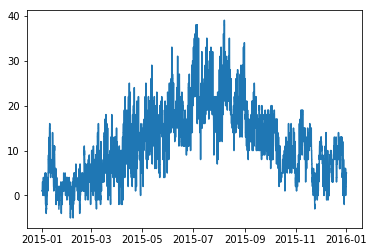

In [4]:
import matplotlib.pyplot as plt

plt.plot(tabelle.air_temperature)
plt.show()

This gives us a nice little line plot with the temperature time series depicted as blue line. However, the plot is a little small, the axes are not labeled and there is no legend. Let's fix that...

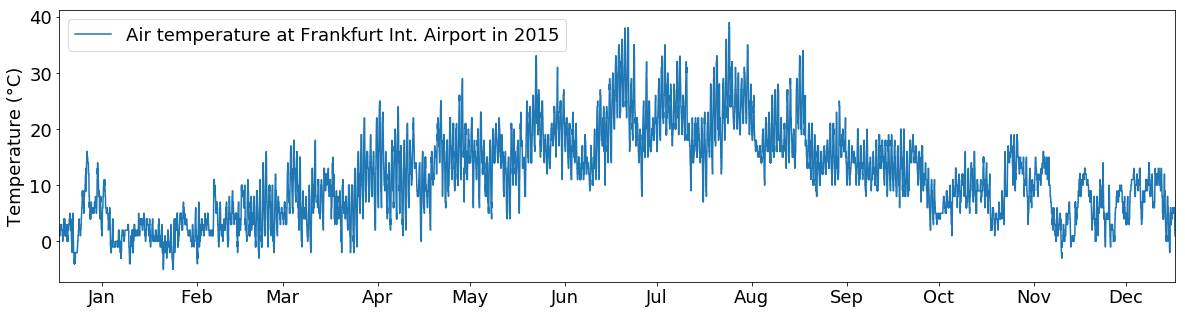

In [6]:
plt.rcParams["font.size"] = 18

plt.figure(figsize=(20,5))
plt.plot(tabelle.air_temperature,label="Air temperature at Frankfurt Int. Airport in 2015")
plt.xlim(("2015-01-01","2015-12-31"))
plt.xticks(["2015-{:02d}-15".format(x) for x in range(1,13,1)],["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.legend()
plt.ylabel("Temperature (°C)")
plt.show()

This looks better. We can see that we do not have to worry about the details of the `axes` and `axis` of the plot since `pyplot` takes care of it for us. Each time we do a function of `pyplot` it just reuses the `axes` from the first plot call.

However, let's say we are not interested in the daily temperature fluctuations.

Additionally while manually constructing the xticks labels works fine, it is a little annoying. Especially since the index of the dataframe (which is used for the x-axis) already contains all information we need and just the formatting is wrong. Fortunately, matplotlib has some convenience functions available in its date submodule we can use if we switch to the "manual-axes" approach.

So let's resample the data to daily means, format the dates and plot it again...

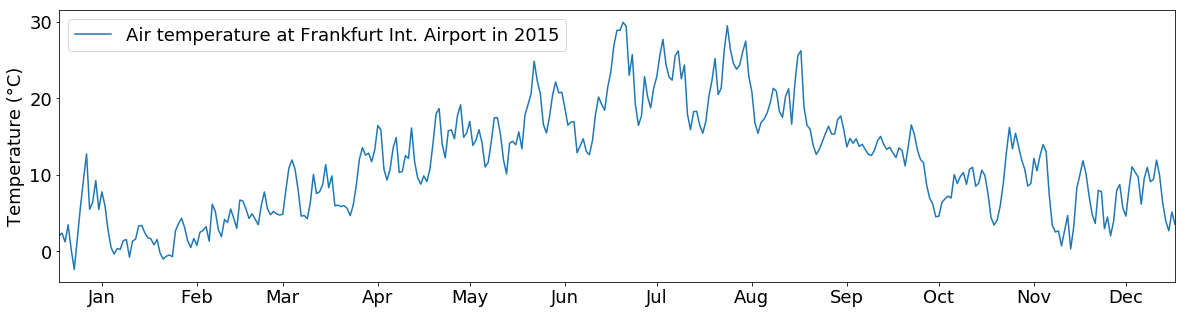

In [7]:
import matplotlib.dates as mdates # we need this for proper date formatting

temp_resampled = tabelle.air_temperature.resample("1d").mean()

# We asign the figure to a variable to be able to manipulate it later
fig = plt.figure(figsize=(20,5))

# Add a new axes to the plot manually. 
# The argument to the add_subplot function is used for positioning of the plot
# First two numbers are number of rows/columns in the figure
# Third number is the position of the plot to create
ax = fig.add_subplot(111)

# Plot the data
ax.plot(temp_resampled,label="Air temperature at Frankfurt Int. Airport in 2015")

# Plot the legend
ax.legend()

# Set the Y-Axis label
ax.set_ylabel("Temperature (°C)")

# Set the limits (range) of the X-Axis
ax.set_xlim(("2015-01-01","2015-12-31"))

# instead of creating the month labels manually (as we did before) we use matplotlib's built-in date locators and formatters
# set up the locator to find the 15th of every month (even though not every month is the same length this is close enough)
days = mdates.DayLocator(bymonthday=15)
# set the date format to the month shortname
monthFmt = mdates.DateFormatter("%b")

# apply locator and formatter to the ticks
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(monthFmt)

plt.show()

You can also put multiple lines into one plot:

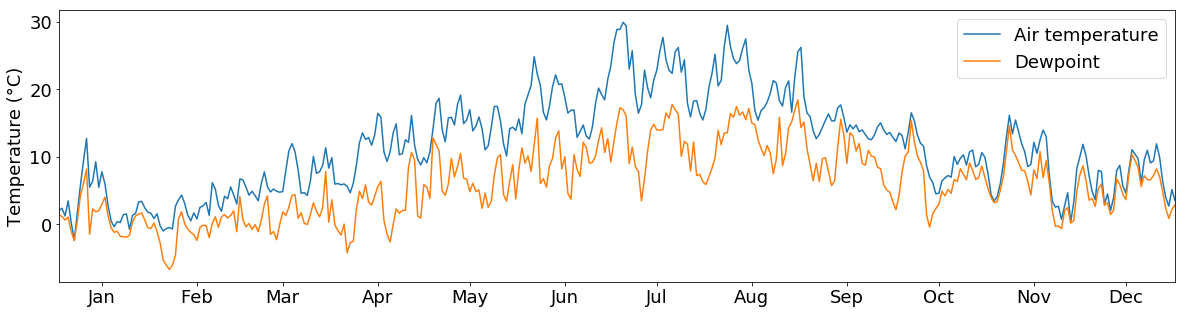

In [8]:
tabelle_resampled = tabelle.loc[:, ["air_temperature", "dewpoint"]].resample("1d").mean()

fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(111)

ax.plot(tabelle_resampled.loc[:, "air_temperature"],label="Air temperature")

# Plot a second line in the same figure
ax.plot(tabelle_resampled.loc[:, "dewpoint"],label="Dewpoint")

ax.legend()
ax.set_ylabel("Temperature (°C)")
ax.set_xlim(("2015-01-01","2015-12-31"))

ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(monthFmt)

plt.show()

And if we don't like the colors or the line types, we can choose different ones by providing the `c` and `linestyle` arguments to the plotting function:

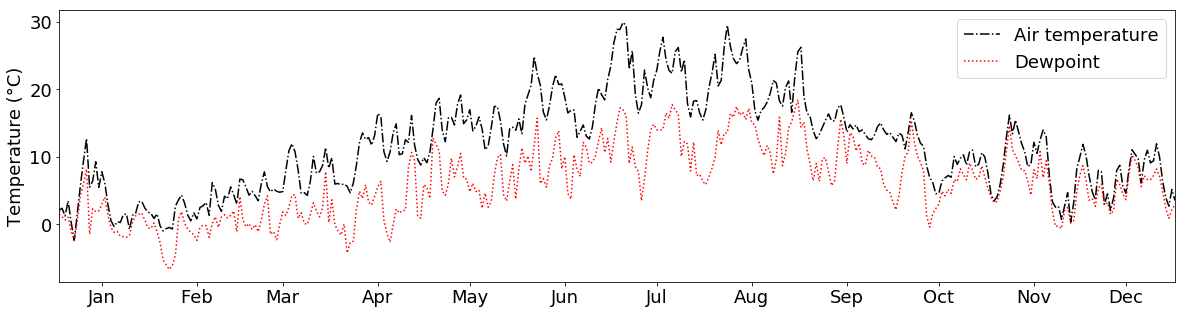

In [45]:
fig = plt.figure(figsize=(20,5))
plt.rcParams["font.size"] = 18

ax = fig.add_subplot(111)

ax.plot(tabelle_resampled.loc[:, "air_temperature"], label="Air temperature", c="k", linestyle="-.")
ax.plot(tabelle_resampled.loc[:, "dewpoint"], label="Dewpoint", c="r", linestyle=":")

ax.legend()
ax.set_ylabel("Temperature (°C)")
ax.set_xlim(("2015-01-01","2015-12-31"))

ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(monthFmt)

plt.show()

What if we want to plot 2 variables in the same plot that have different units, e.g. temperature and air pressure values? 

For this, we can use the `twinx()` function. It creates a second subplot that shares the Y-Axis with the first subplot:

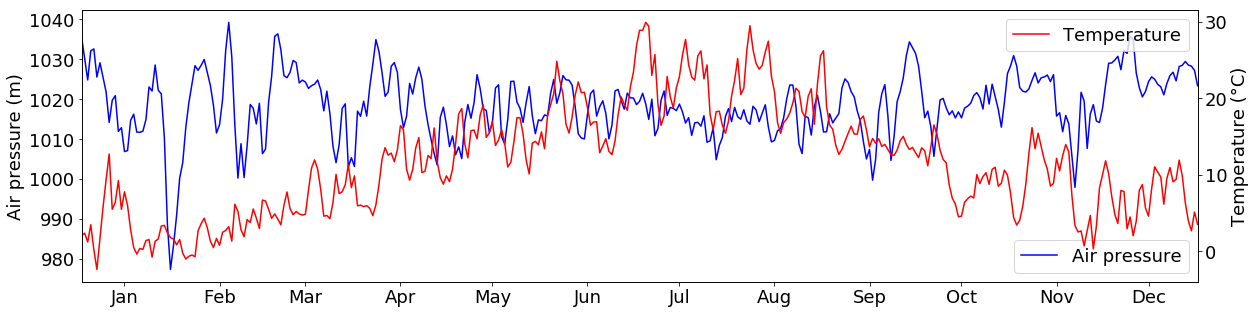

In [46]:
tabelle_resampled = tabelle.loc[:, ["air_temperature", "air_pressure"]].resample("1d").mean()

fig = plt.figure(figsize=(20,5))

ax2 = fig.add_subplot(111)
ax1 = ax2.twinx()

ax1.plot(tabelle_resampled.loc[:, "air_temperature"], c="r", label="Temperature")
ax2.plot(tabelle_resampled.loc[:, "air_pressure"], c="b", label="Air pressure")

ax1.set_ylabel("Temperature (°C)")
ax2.set_ylabel("Air pressure (m)")

ax1.legend()
ax2.legend()

ax1.set_xlim(("2015-01-01","2015-12-31"))

ax1.xaxis.set_major_locator(days)
ax1.xaxis.set_major_formatter(monthFmt)
plt.show()

Normally, subplots are, however, used to plot multiple figures next to each other in one plot. For example, we can create 2 subplots "ax1" and "ax2", that depict temperature and wind speeds next to each other:

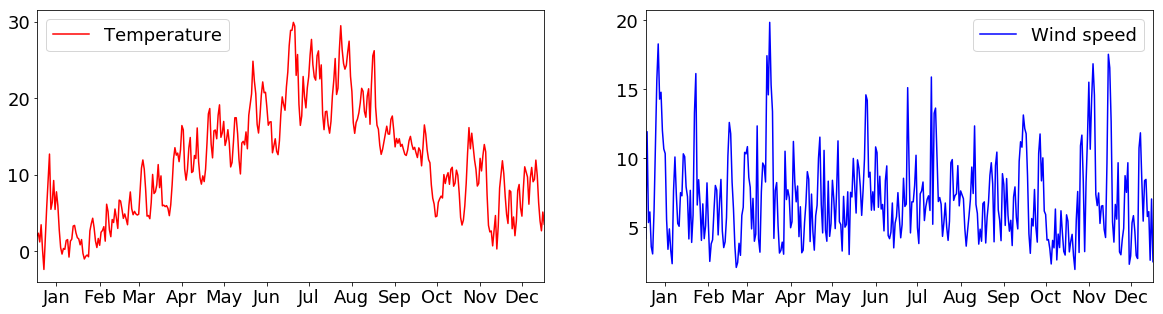

In [10]:
tabelle_resampled = tabelle.loc[:, ["air_temperature", "wind_speed"]].resample("1d").mean()

fig = plt.figure(figsize=(20,5))
plt.rcParams["font.size"] = 18

ax1 = fig.add_subplot(1,2,1) # add a subplot at index 1 into a plot that has 1 row and 2 columns
ax2 = fig.add_subplot(1,2,2) # add a subplot at index 2 into a plot that has 1 row and 2 columns

ax1.plot(tabelle_resampled.loc[:, "air_temperature"], c="r", label="Temperature")
ax2.plot(tabelle_resampled.loc[:, "wind_speed"], c="b", label="Wind speed")

ax1.legend()
ax2.legend()

ax1.set_xlim(("2015-01-01","2015-12-31"))
ax2.set_xlim(("2015-01-01","2015-12-31"))

ax1.xaxis.set_major_locator(days)
ax1.xaxis.set_major_formatter(monthFmt)

ax2.xaxis.set_major_locator(days)
ax2.xaxis.set_major_formatter(monthFmt)

plt.show()

If you want to save your figure, you can simply call the `savefig()` function instead of `show()`:

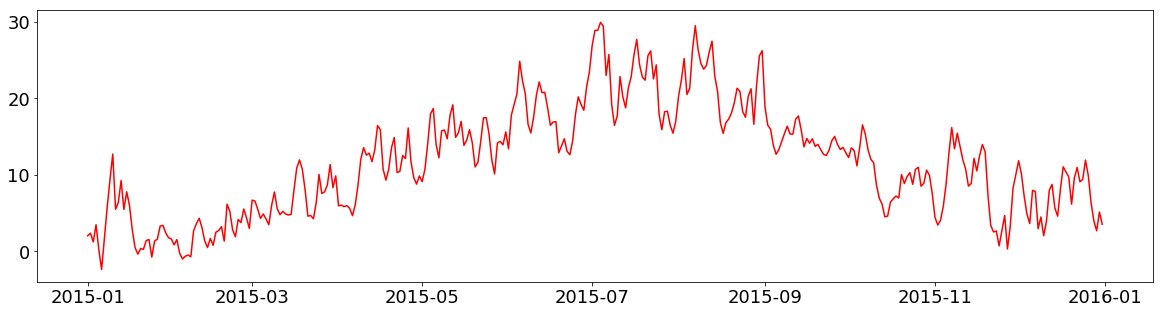

In [48]:
fig = plt.figure(figsize=(20,5))

plt.plot(tabelle.air_temperature.resample("1d").mean(), c="r", label="Temperature")

plt.savefig("images/S01E04/beispiel_output.png")

### Histograms

To get an overview of the distribution of temperature values, we can also plot a histogram of the data:

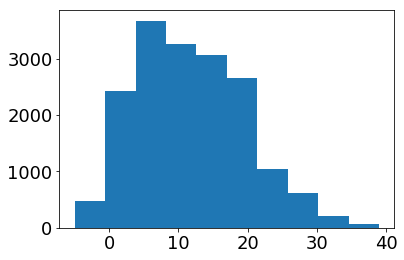

In [49]:
plt.hist(tabelle.air_temperature.dropna())
plt.show()

Again, this plot is nice and simple but we can do better...

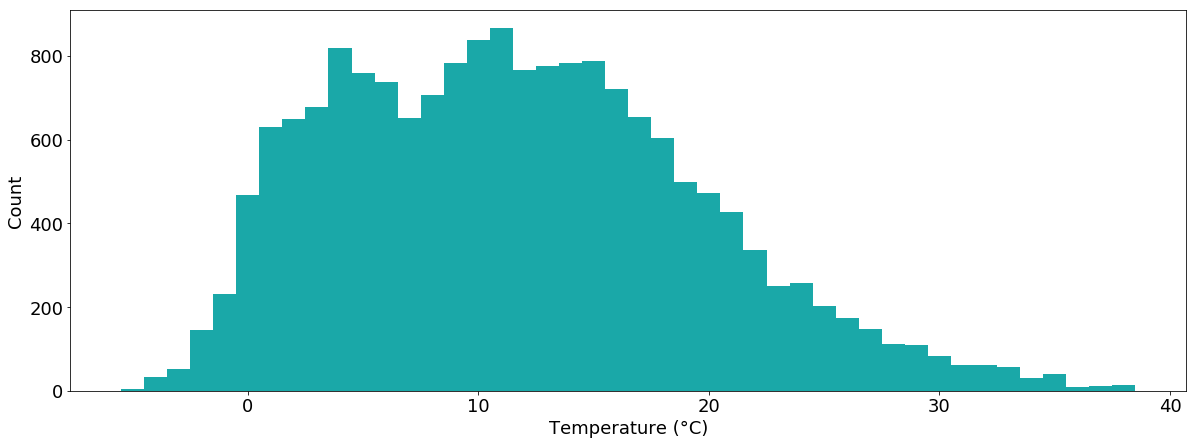

In [50]:
temperatur = tabelle.air_temperature.dropna()

plt.figure(figsize=(20,7))

plt.hist(temperatur,bins=sorted(temperatur.unique()-0.5), color="#1aa8a8")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.show()

We can also plot multiple histograms within one chart, e.g. the temperature values separated into January and August:

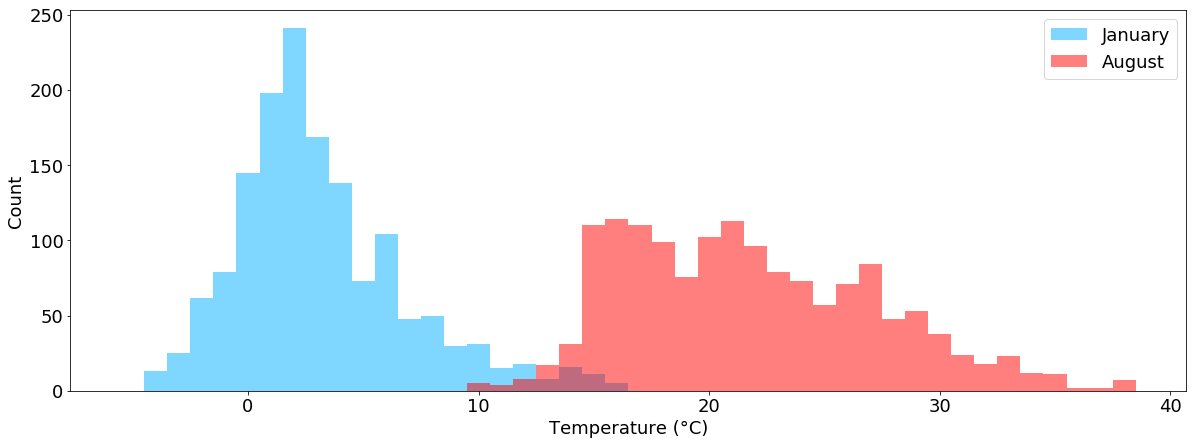

In [51]:
temperatur_jan = tabelle.air_temperature["2015-01"].dropna()
temperatur_aug = tabelle.air_temperature["2015-08"].dropna()

plt.figure(figsize=(20,7))
plt.hist(temperatur_jan,bins=sorted(tabelle.air_temperature.dropna().unique()-0.5), color="#00b1ff", alpha=0.5, label="January")
plt.hist(temperatur_aug,bins=sorted(tabelle.air_temperature.dropna().unique()-0.5), color="#ff0000", alpha=0.5, label="August")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.legend()
plt.show()

And we can draw multiple plot types within one plot. Let's plot the winter and summer temperature counts as lines and the total temperature counts as bars:

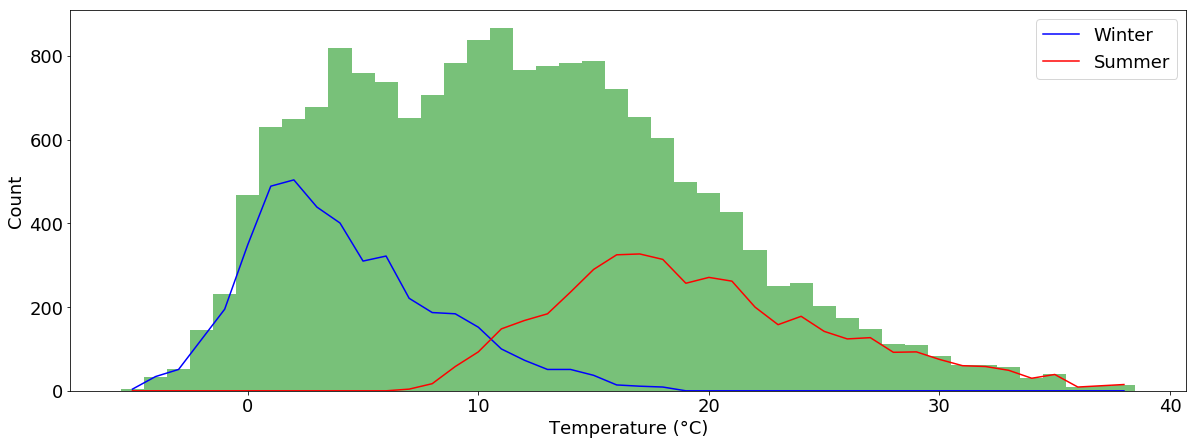

In [52]:
temperatur_jan = tabelle.air_temperature["2015-01"].dropna()
temperatur_aug = tabelle.air_temperature["2015-08"].dropna()

n_w, bins_w, _ = plt.hist(tabelle.air_temperature["2015-01":"2015-03"].dropna(), bins=sorted(tabelle.air_temperature.dropna().unique()-0.5))
n_s, bins_s, _ = plt.hist(tabelle.air_temperature["2015-07":"2015-09"].dropna(), bins=sorted(tabelle.air_temperature.dropna().unique()-0.5))
plt.close()

plt.figure(figsize=(20,7))

plt.hist(tabelle.air_temperature.dropna(), bins=sorted(tabelle.air_temperature.dropna().unique()-0.5), color="#78C179")
plt.plot(bins_w[:-1]+0.5, n_w, label="Winter", c="b")
plt.plot(bins_s[:-1]+0.5, n_s, label="Summer", c="r")

plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.legend()
plt.show()

### Scatterplots

Another often used plot is the scatterplot.

Let's use it to plot temperature vs. air pressure values:

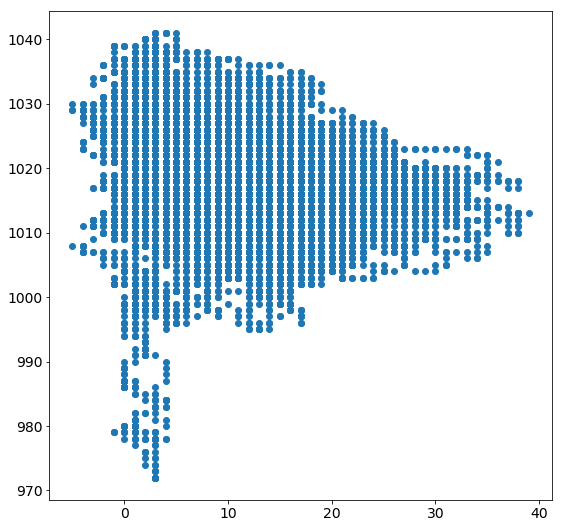

In [53]:
plt.figure(figsize=(9,9))
plt.rcParams["font.size"] = 14

plt.scatter(tabelle.air_temperature, tabelle.air_pressure)
plt.show()

We can also plot multiple scatterplots on top of each other to depict more information within one plot. 

If we do this with temperature/pressure measurements separately for January and August, we can see that air pressures below 1000 hPa were only prevalent during January but not during August and that the air pressure value range was much larger during January than during August:

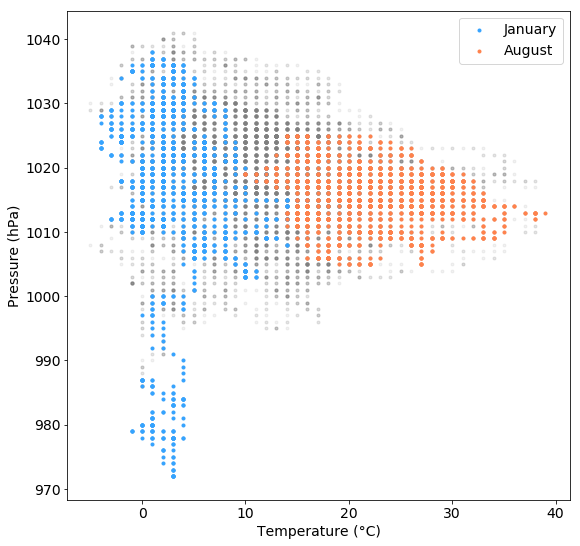

In [54]:
plt.figure(figsize=(9,9))

plt.scatter(tabelle.air_temperature, tabelle.air_pressure, marker=".", c="grey", alpha=0.1, label="")
plt.scatter(tabelle.air_temperature["2015-01"], tabelle.air_pressure["2015-01"], marker=".", c="#35A3FF", alpha=1, label="January")
plt.scatter(tabelle.air_temperature["2015-08"], tabelle.air_pressure["2015-08"], marker=".", c="#FF824C", alpha=1, label="August")

plt.xlabel("Temperature (°C)")
plt.ylabel("Pressure (hPa)")

plt.legend()
plt.show()

There are many more options that you can tweak in order to get a nice looking ready to print plot. 
And of course, there are many more plot types (e.g. bar plots, box plots, 3d plots, ...)
We won't cover all of them here but you can have a look at the [matplotlib documentation](https://matplotlib.org/contents.html).

Also, there are many more plotting libraries out there which cover all kinds of useful plotting routines, e.g. for plotting wind data...

### Windroses

Using the [**windrose**](https://anaconda.org/conda-forge/windrose) extension, you can easily plot the wind data in a typical wind rose chart:

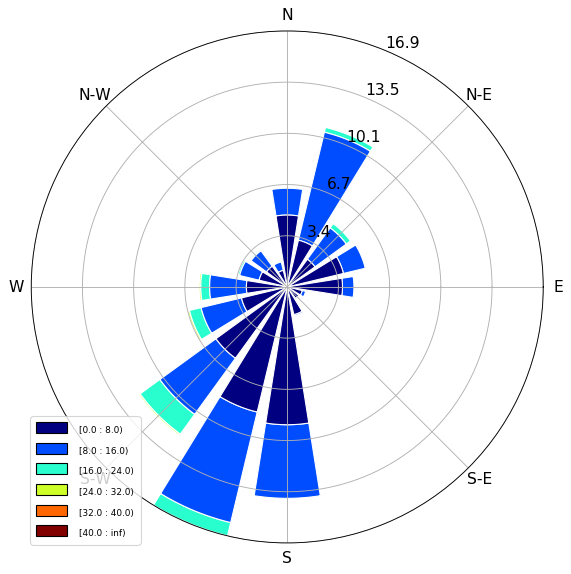

In [55]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(tabelle.wind_direction, tabelle.wind_speed, normed=True, opening=0.8, edgecolor="white")
ax.set_legend()
plt.show()

**Task**

1. Create a simple line plot of the wind speed values of February 2015.
2. Create a simple histogram of the same data.

**Solution**

1. ```python
plt.plot(tabelle.loc["2015-02"].wind_speed)
```

2. ```python
plt.hist(tabelle.loc["2015-02"].wind_speed)
```

**Info**

- Actually the plotting functions in `pandas` use matplotlib in the background too. It just makes smart default assumptions to hide many of the cumbersome `matplotlib` tasks.
- There are other high level plotting libraries like:
    - [Holoviews](http://holoviews.org/)
    - [hvplot](https://hvplot.pyviz.org/) (which is based on holoviews)
    
  They wrap matplotlib and many of the libraries you can see on the [FusionCharts Blog](https://www.fusioncharts.com/blog/best-python-data-visualization-libraries/). They make it easy and fast to explore data interactively because you don't need all the "trouble" of plot configuration like with matplotlib.
  
**So if you are still in the knowledge discovery and exploration phase using one of the high level libraries instead of matplotlib can save you a lot of time, but if you need to configure every detail of your plot there is often no way around the latter.**

## Exercise 4

- Complete the fourth assignment and push your results until tuesday 14:00 next week
- Assignment link: [https://classroom.github.com/a/j4cFzXy8](https://classroom.github.com/a/j4cFzXy8)